# House Sales in King County, USA

## Dataset Description

Data on houses sold in King County, Washington, between May 2014 and May 2015.

#### Attributes

<b>id</b> : A notation for a house

<b> date</b>: Date house was sold


<b>price</b>: Price is prediction target


<b>bedrooms</b>: Number of bedrooms


<b>bathrooms</b>: Number of bathrooms

<b>sqft_living</b>: Square footage of the home

<b>sqft_lot</b>: Square footage of the lot


<b>floors</b> :Total floors (levels) in house


<b>waterfront</b> :House which has a view to a waterfront


<b>view</b>: Has been viewed


<b>condition</b> :How good the condition is overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> : Square footage of house apart from basement


<b>sqft_basement</b>: Square footage of the basement

<b>yr_built</b> : Built Year


<b>yr_renovated</b> : Year when house was renovated

<b>zipcode</b>: Zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> : LotSize area in 2015(implies-- some renovations)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Load Data from CSV

In [2]:
df=pd.read_csv('housing_data.csv')

In [3]:
df.drop(['id','Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

### Examine Dataset

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


**Descriptive Statistics**:

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Preprocessing Data


**Replace missing values of 'bedrooms' and 'bathrooms' with the mean.**

In [7]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace=True)

In [8]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [9]:
print("Missing values for bedrooms :", df['bedrooms'].isnull().sum())
print("Missing values for bathrooms :", df['bathrooms'].isnull().sum())

Missing values for bedrooms : 0
Missing values for bathrooms : 0


# Data exploration, visualization

**Find unique floors and place in dataframe**

In [10]:
unique_floors = df['floors'].value_counts().to_frame()

**Create a boxplot to see if waterfront view affects price outliers (it does).**

<AxesSubplot:xlabel='waterfront', ylabel='price'>

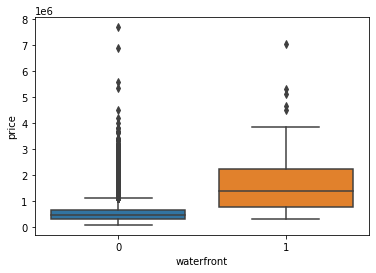

In [11]:
sns.boxplot(x=df['waterfront'], y=df['price'])

**Regression plot of sqft_above and price. sqft_above positively correlates with price.**

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

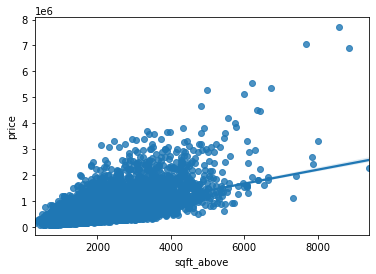

In [12]:
sns.regplot(x='sqft_above', y= 'price', data=df)

**Find other features' correlations with price.**

In [13]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Linear Regression Models

**Fit regression model and calculate R^2 (Without Train/Test Split):**

In [14]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y) # Will be overfitted

0.00046769430149007363

**Predict price using sqft_living, calculate R^2 (Without Train/Test Split):**

In [15]:
Y = df[['price']]
X = df[['sqft_living']]
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y) # Will be overfitted

0.4928532179037931

**Predict price using multiple features (Without Train/Test Split):**

In [16]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [17]:
x = df[features]
y = df[['price']]
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y) # Will be overfitted

0.6576950675754207

**Pipeline using standard scalar, polynomial features, and linear regression**


In [18]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [19]:
pipe = Pipeline(Input)
pipe.fit(df[features], y)
pipe.score(df[features], y) # Will be overfitted


0.7512920268029277

# Model Evaluation and Refinement

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### Train/Test Split

In [21]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("Test sample count:", x_test.shape[0])
print("Training sample count:",x_train.shape[0])

Test sample count: 3242
Training sample count: 18371


### Ridge regression 

In [22]:
from sklearn.linear_model import Ridge

In [23]:
rm = Ridge(alpha=0.1)
rm.fit(x_train,y_train)
rm.score(x_test,y_test)

0.6478759163939112

### Ridge regression with transform data (2nd order polynomial)

In [24]:
poly = PolynomialFeatures(degree=2)

# Transform training and test data
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# Ridge Regression object
p_rm = Ridge(alpha=0.1)

# Fit & Score model
p_rm.fit(x_train_poly, y_train)
p_rm.score(x_test_poly, y_test)

0.7002744269446104